Saving bac98a31-8f06-4660-bad0-cef4cefb2524.jpg to bac98a31-8f06-4660-bad0-cef4cefb2524.jpg
Saving 85c04667-e092-4538-bb4a-038ad331d6ec.jpg to 85c04667-e092-4538-bb4a-038ad331d6ec (8).jpg
Saving 5308026596977929324.jpg to 5308026596977929324 (8).jpg


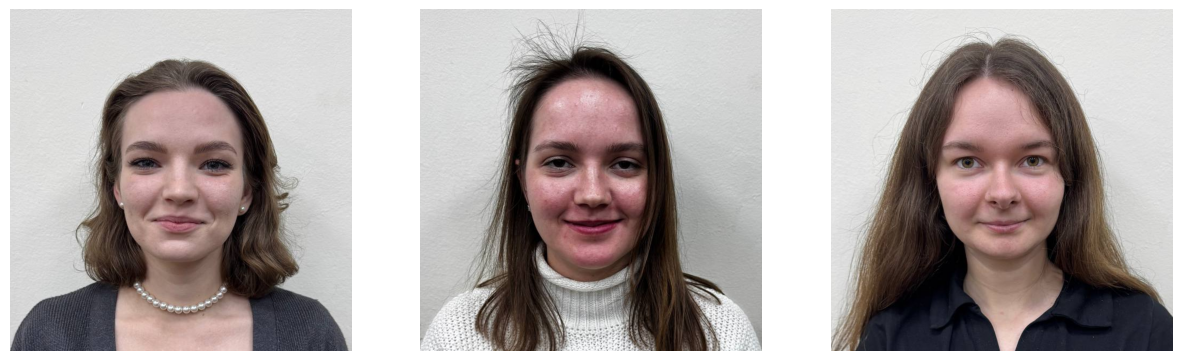

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

def extract_face_fragment(image):

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    fragments = []

    for (x, y, w, h) in faces:

        fragment_size = (w * 2, h * 2)
        x_center = x + w // 2
        y_center = y + h // 2

        x_start = max(0, x_center - fragment_size[0] // 2)
        y_start = max(0, y_center - fragment_size[1] // 2)

        x_end = min(image.shape[1], x_center + fragment_size[0] // 2)
        y_end = min(image.shape[0], y_center + fragment_size[1] // 2)

        fragment = image[y_start:y_end, x_start:x_end]
        fragments.append(fragment)

    return fragments

uploaded = files.upload()

all_fragments = []

for filename in uploaded.keys():

    image = cv2.imread(filename)
    fragments = extract_face_fragment(image)
    all_fragments.extend(fragments)

plt.figure(figsize=(15, 10))
for i, fragment in enumerate(all_fragments):
    plt.subplot(1, len(all_fragments), i + 1)
    plt.imshow(cv2.cvtColor(fragment, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

Saving e81a08d9-01f4-4c0e-a5a3-011324ec92a6.jpg to e81a08d9-01f4-4c0e-a5a3-011324ec92a6 (1).jpg
Saving bac98a31-8f06-4660-bad0-cef4cefb2524.jpg to bac98a31-8f06-4660-bad0-cef4cefb2524 (2).jpg
Saving 85c04667-e092-4538-bb4a-038ad331d6ec.jpg to 85c04667-e092-4538-bb4a-038ad331d6ec (9).jpg
Saving 5308026596977929324.jpg to 5308026596977929324 (9).jpg


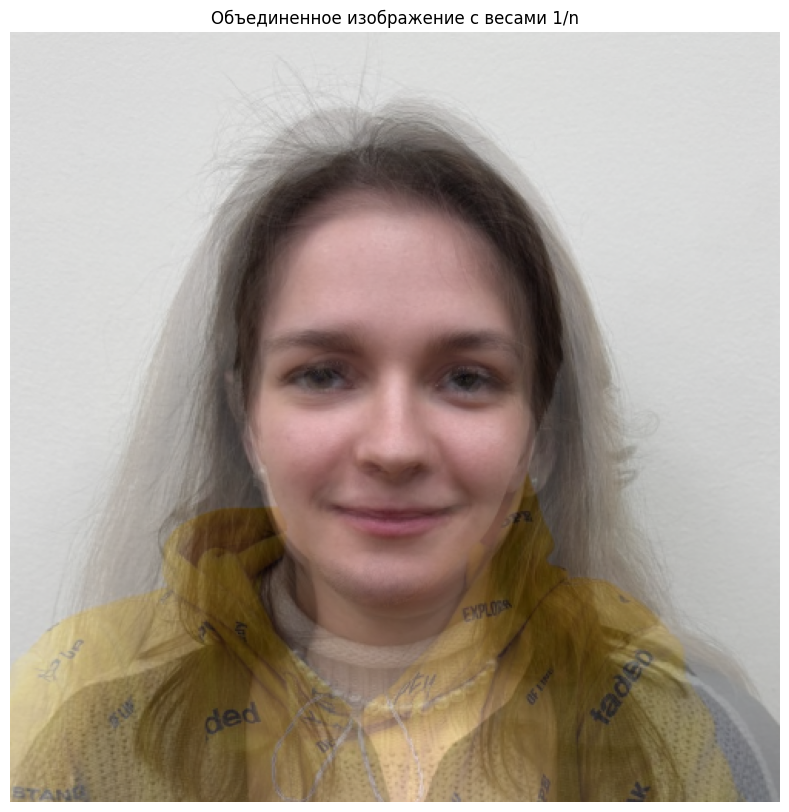

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

def extract_face_fragment(image):

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    fragments = []

    for (x, y, w, h) in faces:

        fragment_size = (w * 2, h * 2)

        x_center = x + w // 2
        y_center = y + h // 2

        x_start = max(0, x_center - fragment_size[0] // 2)
        y_start = max(0, y_center - fragment_size[1] // 2)

        x_end = min(image.shape[1], x_center + fragment_size[0] // 2)
        y_end = min(image.shape[0], y_center + fragment_size[1] // 2)

        # Извлекаем фрагмент
        fragment = image[y_start:y_end, x_start:x_end]
        fragments.append(fragment)

    return fragments

uploaded = files.upload()

all_fragments = []


for filename in uploaded.keys():

    image = cv2.imread(filename)
    fragments = extract_face_fragment(image)
    all_fragments.extend(fragments)

target_size = (500, 500)
resized_fragments = [cv2.resize(fragment, target_size) for fragment in all_fragments]

n = len(resized_fragments)
combined_image = np.zeros_like(resized_fragments[0], dtype=np.float32)

for fragment in resized_fragments:
  combined_image += fragment / n

combined_image = np.clip(combined_image, 0, 255).astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Объединенное изображение с весами 1/n")
plt.show()

Saving 85c04667-e092-4538-bb4a-038ad331d6ec.jpg to 85c04667-e092-4538-bb4a-038ad331d6ec (6).jpg
Saving 5308026596977929324.jpg to 5308026596977929324 (6).jpg


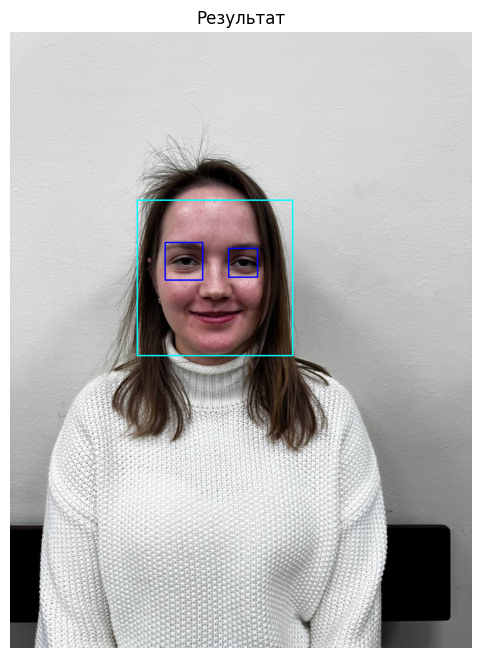

In [12]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

face_cascade_path = 'haarcascade_frontalface_default.xml'
eye_cascade_path = 'haarcascade_eye.xml'

face_cascade = cv2.CascadeClassifier(face_cascade_path)
eye_cascade = cv2.CascadeClassifier(eye_cascade_path)

uploaded = files.upload()
image_path = next(iter(uploaded))
image = cv2.imread(image_path)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 255, 0), 2)
    face_img = image[y:y + h, x:x + w]
    eye = eye_cascade.detectMultiScale(face_img, 1.3, 5)
    for (ex, ey, ew, eh) in eye:
        cv2.rectangle(image, (x + ex, y + ey), (x + ex + ew, y + ey + eh), (255, 0, 0), 2)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Результат')
plt.show()